In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')

Loaded


In [53]:
def pct_dist(a, b):
    return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 


def openai_spend_on_largest_model_this_year(total_investment,
                                            percent_investment_spent_this_year,
                                            percent_spend_on_compute,
                                            percent_compute_on_biggest_model):
    return sq.dist_fn(total_investment * percent_investment_spent_this_year * percent_spend_on_compute * percent_compute_on_biggest_model,
                      fn=np.log10)


gpt3_prediction = openai_spend_on_largest_model_this_year(total_investment=1*B,
                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                          percent_spend_on_compute=pct_dist(0.2, 0.7),
                                                          percent_compute_on_biggest_model=pct_dist(0.05, 0.15))


samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
actual_gpt3_spend = 2.4*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend is at the {}th percentile of the model'.format(round(np.mean([s <= np.log10(actual_gpt3_spend) for s in samples]) * 100, 1)))


{1: '426 thousand',
 5: '829 thousand',
 10: '1 million',
 20: '2 million',
 30: '2 million',
 40: '3 million',
 50: '4 million',
 60: '5 million',
 70: '7 million',
 80: '9 million',
 90: '13 million',
 95: '19 million',
 99: '36 million'}
-
Actual spend is at the 29.8th percentile of the model


In [54]:
# OpenAI has 375 people as of 2023 Jan per https://twitter.com/sama/status/1617627882997813248
# if we assume it costs $500K per person and that payroll is half of non-compute costs, that means $375M per year is spent
largest_openai_model_2023_prediction = openai_spend_on_largest_model_this_year(total_investment=10*B,
                                                                               percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                               percent_spend_on_compute=pct_dist(0.2, 0.9),
                                                                               percent_compute_on_biggest_model=pct_dist(0.05, 0.2))
samples = largest_openai_model_2023_prediction @ (100*K)

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '4 million',
 5: '9 million',
 10: '14 million',
 20: '21 million',
 30: '30 million',
 40: '40 million',
 50: '52 million',
 60: '67 million',
 70: '89 million',
 80: '124 million',
 90: '193 million',
 95: '279 million',
 99: '558 million'}


In [55]:
def google_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                            percent_r_and_d_on_ai,
                                            percent_ai_spend_on_compute,
                                            percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)


largest_google_model_2023_prediction = google_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.norm(22*B, 40*B, lclip=20*B),
                                                                               percent_r_and_d_on_ai=pct_dist(0.05, 0.5),
                                                                               percent_ai_spend_on_compute=pct_dist(0.2, 0.9),
                                                                               percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_google_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '401 thousand',
 5: '1 million',
 10: '2 million',
 20: '4 million',
 30: '7 million',
 40: '12 million',
 50: '20 million',
 60: '34 million',
 70: '60 million',
 80: '116 million',
 90: '289 million',
 95: '619 million',
 99: '2 billion'}


In [56]:
mixed_model = sq.dist_max(largest_openai_model_2023_prediction, largest_google_model_2023_prediction)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

{1: '7 million',
 5: '14 million',
 10: '21 million',
 20: '33 million',
 30: '46 million',
 40: '61 million',
 50: '80 million',
 60: '106 million',
 70: '145 million',
 80: '214 million',
 90: '384 million',
 95: '679 million',
 99: '2 billion'}


Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 6.859881640085424,
 5: 7.158643107751685,
 10: 7.3237595472541805,
 20: 7.5179240871605355,
 30: 7.6626195019355485,
 40: 7.791465732091865,
 50: 7.90878444940408,
 60: 8.029648070616734,
 70: 8.16033266928585,
 80: 8.326905366053468,
 90: 8.58102956352293,
 95: 8.832051821129994,
 99: 9.377453038561937}


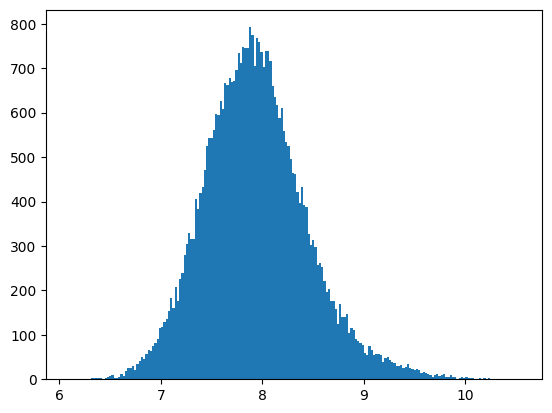

In [57]:
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

In [58]:
sq.get_percentiles(sq.norm(7.16, 8.83) @ 100000)

{1: 6.815068439729206,
 5: 7.163139889485014,
 10: 7.349337937793245,
 20: 7.572983629206142,
 30: 7.732399122601671,
 40: 7.868764846436541,
 50: 7.9965632757152605,
 60: 8.124928456570865,
 70: 8.263274204334282,
 80: 8.42572719581234,
 90: 8.643617918987335,
 95: 8.82387044553499,
 99: 9.172833081119142}